In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan=pd.read_csv('C:\\UpGrad\\Loan_case_study\\loan\\loan.csv',low_memory=False)

<h3>Objectives of case study :</h3>
- <b>The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default</b>
- <b>Know the people who are likely to pay the loan</b>
- <b>Know the people who are not likely to pay the loan</b>

In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


- Info says a lot their are 111 columns,39717 rows,74 are float values and 13 are int and 24 are categorical values.

In [4]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


<h3>Assumptions made for case Study:</h3>
- <b>Columns with all the null values have no impact.So we remove such columns</b>
- <b>Columns with only one value also has no impact as if we try to combine with any other parameter to do bivariate analysis as one of the column has single value,it would be like doing univariate analysis on other column.So we remove such columns.</b>
- <b>Columns with date value like Issue date,Next payment date,last payment date and last credit pull date have no impact to loan status because</b>
<ol>
    <li><i>Issue date is the month on which loan was funded,So that does not effect weather he/she will pay the loan or no.</i></li>
    <li>
        <i>Next payment date comes for current loan but we need to know the customers who have paid or default to determine weather to give loan to upcoming customers.</i>
    </li>
    <li>
        <i>Last payment date is also similar to next payment date applies to current loan.</i>
    </li>
    <li>
        <i>Since last credit pull date ref to as activity for that account,since we have data with activity as Fully paid,current,charged off it will definately have some value and all the values are within the same year 2019 from given data</i>
    </li>
</ol>

In [5]:
loan.drop_duplicates(inplace=True)

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.9+ MB


- No duplicate rows present in dataset as it still has 39717 entries

- <b>We drop all the columns containing all the null values.</b>

In [7]:
loan.dropna(axis=1,how='all',inplace=True)

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 57 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

- After drop 57 columns left in the dataset

In [9]:
(loan.isnull().sum(axis=0)/len(loan))*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


- <b>Like we discussed we drop all the columns which do not have impact on loan Status i,e weather he/she will pay the loan or no.</b>

In [10]:
loan.drop(['funded_amnt','funded_amnt_inv','issue_d','url','desc','zip_code','addr_state','collections_12_mths_ex_med','collection_recovery_fee','tax_liens','next_pymnt_d'],inplace=True,axis=1)

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 46 columns):
id                          39717 non-null int64
member_id                   39717 non-null int64
loan_amnt                   39717 non-null int64
term                        39717 non-null object
int_rate                    39717 non-null object
installment                 39717 non-null float64
grade                       39717 non-null object
sub_grade                   39717 non-null object
emp_title                   37258 non-null object
emp_length                  38642 non-null object
home_ownership              39717 non-null object
annual_inc                  39717 non-null float64
verification_status         39717 non-null object
loan_status                 39717 non-null object
pymnt_plan                  39717 non-null object
purpose                     39717 non-null object
title                       39706 non-null object
dti                         39717 non-null

- After droppping columns we are left with 46 columns.

In [12]:
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

- **From above output No of people who have paid loan are more comapred to Charged off and current**

Text(0,0.5,'Frequency of Loan')

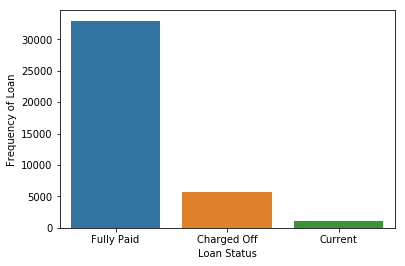

In [13]:
sns.countplot('loan_status',data=loan)
plt.xlabel('Loan Status')
plt.ylabel('Frequency of Loan')

Text(0,0.5,'Frequency of Loan')

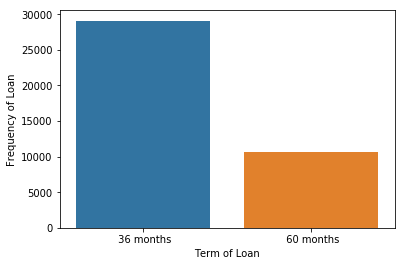

In [14]:
sns.countplot(x='term',data=loan)
plt.xlabel('Term of Loan')
plt.ylabel('Frequency of Loan')

- No of people taking short term(36 months) are more than long term(60 months).

Text(0.5,0,'Loan Grade')

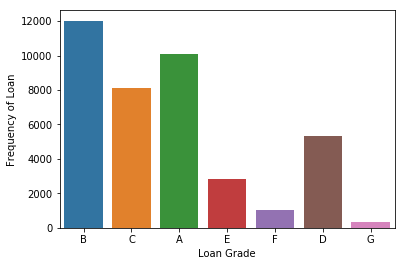

In [15]:
sns.countplot(x='grade',data=loan)
plt.ylabel('Frequency of Loan')
plt.xlabel('Loan Grade')

- No of people taking loan in grade B,A and C are more comapred to other grades

Text(0.5,0,'Loan Subgrade')

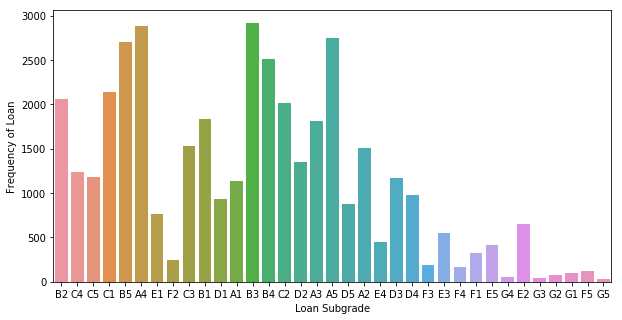

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='sub_grade',data=loan)
plt.ylabel('Frequency of Loan')
plt.xlabel('Loan Subgrade')

Text(0.5,0,'Home Ownership')

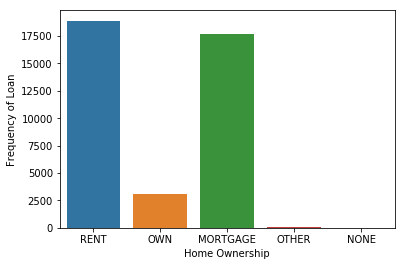

In [17]:
sns.countplot(x='home_ownership',data=loan)
plt.ylabel('Frequency of Loan')
plt.xlabel('Home Ownership')

- From the above graph People with Rent and Mortgage tend to take more no of loans.

Text(0.5,0,'LC Verification Status')

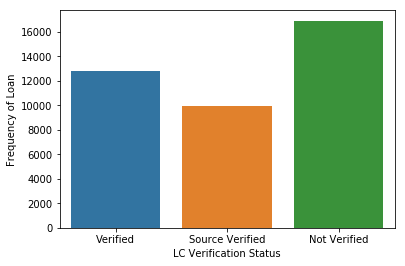

In [18]:
sns.countplot(x='verification_status',data=loan)
plt.ylabel('Frequency of Loan')
plt.xlabel('LC Verification Status')

- From the above graph,LC not verified people have taken more loan than others.

In [19]:
np.unique(loan['pymnt_plan'])

array(['n'], dtype=object)

In [20]:
loan.drop('pymnt_plan',axis=1,inplace=True)

Text(0.5,0,'Delinquency for past 2yrs')

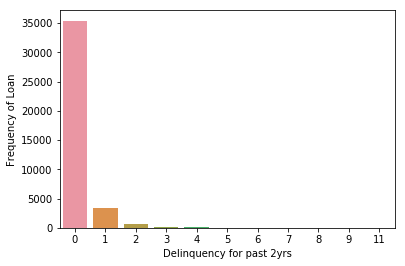

In [21]:
sns.countplot(x='delinq_2yrs',data=loan)
plt.ylabel('Frequency of Loan')
plt.xlabel('Delinquency for past 2yrs')

- From the above graph,More people with deliquency of 0,1 for past 2 years have taken loan compared to others.

Text(0.5,0,'No of inquiries in last 6 months')

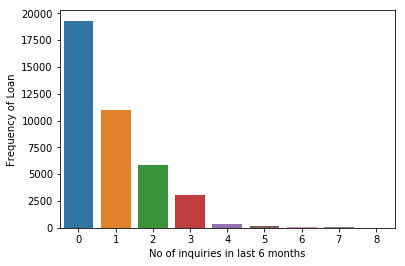

In [22]:
sns.countplot(x='inq_last_6mths',data=loan)
plt.ylabel('Frequency of Loan')
plt.xlabel('No of inquiries in last 6 months')

- From the above graph,More people with having No of Inquiries equals to 0,1,2,3 for last 6 months have taken loan compared to others.

Text(0.5,0,'Number of derogatory public records')

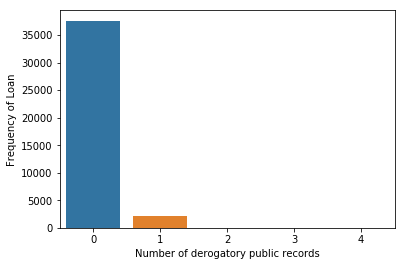

In [23]:
sns.countplot(x='pub_rec',data=loan)
plt.ylabel('Frequency of Loan')
plt.xlabel('Number of derogatory public records')

- From the above graph,More people with derogatory public record of 0 have taken loan.

- **As discussed above we remore all the columns with single values.**

In [24]:
np.unique(loan['initial_list_status'])

array(['f'], dtype=object)

In [25]:
loan.drop('initial_list_status',axis=1,inplace=True)

In [26]:
np.unique(loan['policy_code'])

array([1], dtype=int64)

In [27]:
loan.drop('policy_code',axis=1,inplace=True)

In [28]:
np.unique(loan['application_type'])

array(['INDIVIDUAL'], dtype=object)

In [29]:
loan.drop('application_type',axis=1,inplace=True)

In [30]:
np.unique(loan['acc_now_delinq'])

array([0], dtype=int64)

In [31]:
loan.drop('acc_now_delinq',axis=1,inplace=True)

In [32]:
np.unique(loan['chargeoff_within_12_mths'])

array([ 0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan])

In [33]:
loan.drop('chargeoff_within_12_mths',axis=1,inplace=True)

In [34]:
np.unique(loan['delinq_amnt'])

array([0], dtype=int64)

In [35]:
loan.drop('delinq_amnt',axis=1,inplace=True)

Text(0.5,0,'Number of public record bankruptcies')

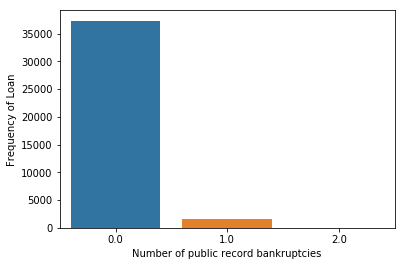

In [36]:
sns.countplot('pub_rec_bankruptcies',data=loan)
plt.ylabel('Frequency of Loan')
plt.xlabel('Number of public record bankruptcies')

- From the above graph,Max amount of people with no bankruptcies take loan.

Text(0.5,0,'Employment length')

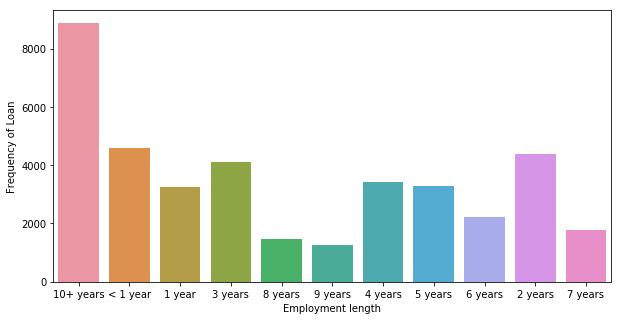

In [37]:
plt.figure(figsize=(10,5))
sns.countplot('emp_length',data=loan)
plt.ylabel('Frequency of Loan')
plt.xlabel('Employment length')

- From the above graph,Max no people having 10+,<1,2 and 3 take loan compared to others.

Text(0.5,0,'Purpose')

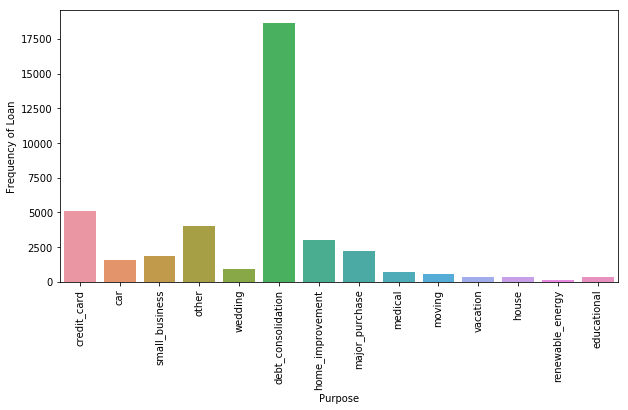

In [38]:
plt.figure(figsize=(10,5))
sns.countplot('purpose',data=loan)
plt.xticks(rotation='90')
plt.ylabel('Frequency of Loan')
plt.xlabel('Purpose')

- From the above graph,Max people with purpose of Debt Consolidation and Credit card take loan compared to others.

In [39]:
loan.drop(['mths_since_last_delinq','mths_since_last_record'],axis=1,inplace=True)

- We drop the above 2 columns as they contain higher % of null values which is more that 50%.

In [42]:
(loan.isnull().sum()/len(loan))*100

id                      0.000000
member_id               0.000000
loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               6.191303
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.027696
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.125891
total_acc               0.000000
out_prncp               0.000000
out_prncp_inv           0.000000
total_pymnt             0.000000
total_pymnt_inv         0.000000
total_rec_prncp         0.000000
total_rec_

In [43]:
loan['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

- <b>Below columns contain null values which is `<1%`,So we substitute it by most occurring value</b>

In [44]:
loan.loc[loan['emp_length'].isnull(),'emp_length']='10+ years'

In [45]:
loan['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [46]:
loan.loc[loan['pub_rec_bankruptcies'].isnull(),'pub_rec_bankruptcies']=0.0

In [47]:
(loan.isnull().sum()/len(loan))*100

id                      0.000000
member_id               0.000000
loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               6.191303
emp_length              0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.027696
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.125891
total_acc               0.000000
out_prncp               0.000000
out_prncp_inv           0.000000
total_pymnt             0.000000
total_pymnt_inv         0.000000
total_rec_prncp         0.000000
total_rec_

<h4>We manully pick the columns which play vital role on the loan status i,e the person pays the loan or no.</h4>
<h4>All the columns except the below are more related investment made and data given by borrower like description,state or zipcode which are completely irrelavant in our case.</h4>
<h4>These are the columns we choose for further analysis in new dataframe:</h4> <b>`id`,`member_id`,`loan_amnt`,`term`,`int_rate`,`installment`,`grade`,`sub_grade`,`emp_length`,<br/>`home_ownership`,`annual_inc`,`verification_status`,`loan_status`,`purpose`,`dti`,`delinq_2yrs`,<br/>`inq_last_6mths`,`open_acc`,`pub_rec`,`revol_util`,`total_acc`,`pub_rec_bankruptcies`</b>

In [48]:
ln_filtered=loan[['id','member_id','loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership','annual_inc','verification_status','loan_status','purpose','dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_util','total_acc','pub_rec_bankruptcies']]

In [49]:
ln_filtered.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,1077501,1296599,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,Fully Paid,credit_card,27.65,0,1,3,0,83.70%,9,0.0
1,1077430,1314167,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,Charged Off,car,1.00,0,5,3,0,9.40%,4,0.0
2,1077175,1313524,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,Fully Paid,small_business,8.72,0,2,2,0,98.50%,10,0.0
3,1076863,1277178,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,Fully Paid,other,20.00,0,1,10,0,21%,37,0.0
4,1075358,1311748,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,...,Current,other,17.94,0,0,15,0,53.90%,38,0.0


Text(0.5,1,'Term with Loan Status')

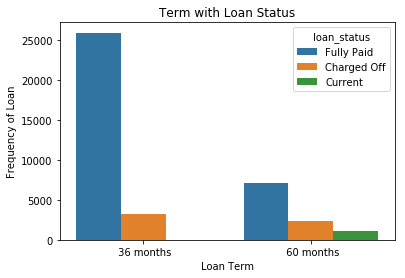

In [50]:
sns.countplot('term',hue='loan_status',data=ln_filtered)
plt.ylabel('Frequency of Loan')
plt.xlabel('Loan Term')
plt.title('Term with Loan Status')

- From the abobe graph,More People with 36months likey to cherged off than 60 months

<b>DTI to give loan should be <=36% taken ref from link</b><br/> <a>https://www.investopedia.com/terms/d/dti.asp</a>

<b>Revolving utilization ration should be <=30% taken ref from link</b><br/><a>https://www.nerdwallet.com/blog/finance/30-percent-credit-utilization-ratio-rule/</a>

Text(0.5,1,'Purpose with Loan Status')

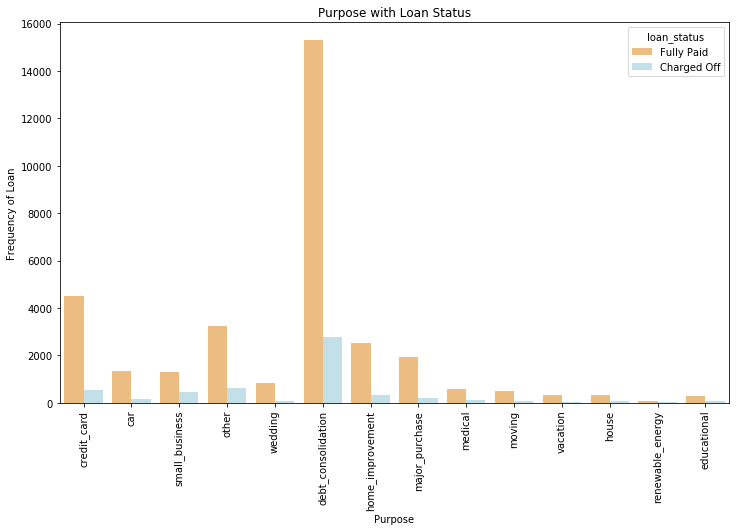

In [51]:
plt.figure(figsize=(12,7))
sns.countplot('purpose',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'],palette='RdYlBu')
plt.xticks(rotation='90')
plt.ylabel('Frequency of Loan')
plt.xlabel('Purpose')
plt.title('Purpose with Loan Status')

Text(0.5,1,'Public Record with Loan Status')

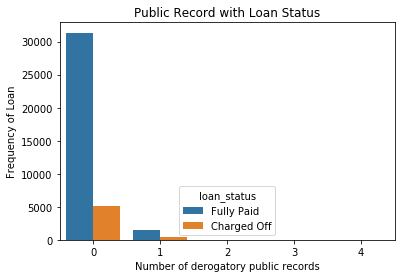

In [52]:
sns.countplot('pub_rec',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Frequency of Loan')
plt.xlabel('Number of derogatory public records')
plt.title('Public Record with Loan Status')

Text(0.5,1,'Public record bankruptcies with Loan Status')

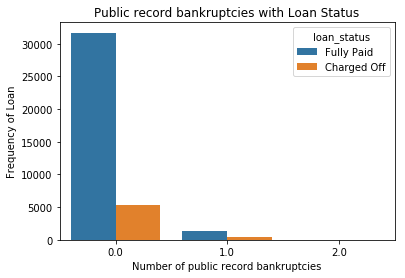

In [53]:
sns.countplot('pub_rec_bankruptcies',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Frequency of Loan')
plt.xlabel('Number of public record bankruptcies')
plt.title('Public record bankruptcies with Loan Status')

Text(0.5,1,'Delinquency for last 2yrs with Loan Status')

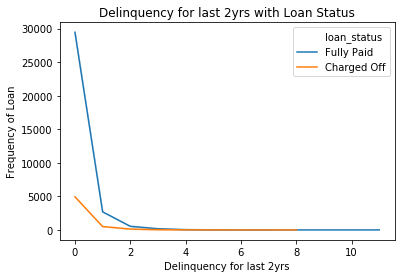

In [54]:

sns.lineplot('delinq_2yrs','member_id',hue='loan_status',estimator=np.count_nonzero,data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Frequency of Loan')
plt.xlabel('Delinquency for last 2yrs')
plt.title('Delinquency for last 2yrs with Loan Status')

Text(0.5,1,'No of Inquiries in past 6 months with Loan Status')

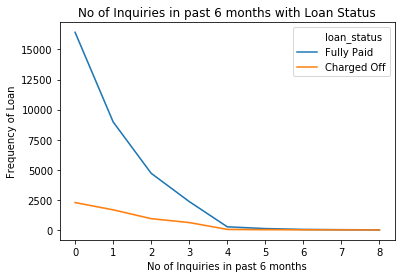

In [55]:
sns.lineplot('inq_last_6mths','member_id',estimator=np.count_nonzero,hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Frequency of Loan')
plt.xlabel('No of Inquiries in past 6 months')
plt.title('No of Inquiries in past 6 months with Loan Status')

Text(0.5,1,'Employement length with Loan Status')

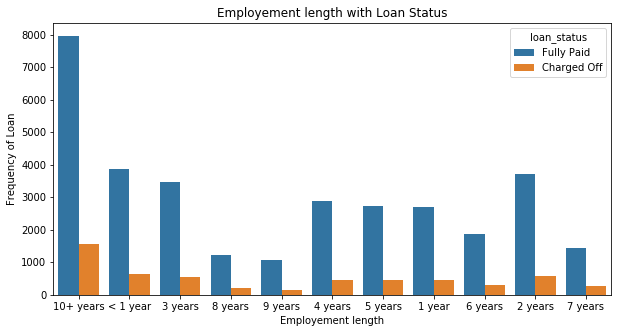

In [56]:
plt.figure(figsize=(10,5))
plt.yscale('linear')
sns.countplot('emp_length',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Frequency of Loan')
plt.xlabel('Employement length')
plt.title('Employement length with Loan Status')

Text(0.5,1,'LC Loan Grade with Loan Status')

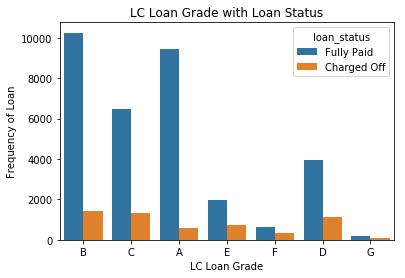

In [57]:
sns.countplot('grade',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Frequency of Loan')
plt.xlabel('LC Loan Grade')
plt.title('LC Loan Grade with Loan Status')

Text(0.5,1,'Home Ownership with Loan Status')

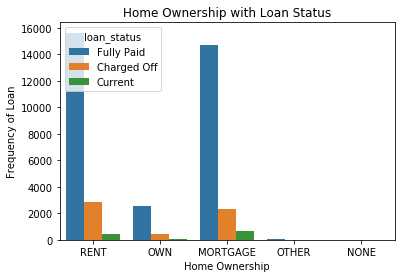

In [58]:
sns.countplot('home_ownership',hue='loan_status',data=ln_filtered)
plt.ylabel('Frequency of Loan')
plt.xlabel('Home Ownership')
plt.title('Home Ownership with Loan Status')

Text(0.5,1,'LC verification status with Loan Status')

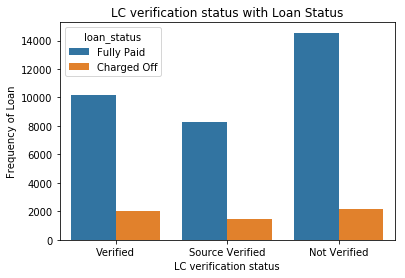

In [59]:
sns.countplot('verification_status',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Frequency of Loan')
plt.xlabel('LC verification status')
plt.title('LC verification status with Loan Status')

In [60]:
ln_filtered['revol_withot_per']=ln_filtered.loc[~ln_filtered['revol_util'].isnull(),'revol_util'].map(lambda x:float(x.split('%')[0]))

- Removing % symbol to make to numerical value and adding it to new column.

In [61]:
ln_filtered['int_rate_withot_per']=ln_filtered['int_rate'].map(lambda x:float(x.split('%')[0]))

In [62]:
def cat_loanamount(data):
    if data<=5000:
        return 'wthn5K'
    elif data>5000 and data<=10000:
        return 'wthn5kto10K'
    elif data>10000 and data<=15000:
        return 'wthn10kto15k'
    elif data>15000 and data<=20000:
        return 'wthn15kto20k'
    elif data>20000 and data<=25000:
        return 'wthn20kto25k'
    elif data>25000 and data<=30000:
        return 'wth25kto30k'
    elif data>30000 and data<=35000:
        return 'wthn30kto35k'
    elif data>35000 and data<=40000:
        return 'wth35kto40k'

- Above function converts numerical loan amout to catagorical values for ease of analysis.

In [63]:
ln_filtered['cat_loan_amt']=ln_filtered['loan_amnt'].map(lambda x:cat_loanamount(x))

- creating derived column

In [64]:
def cat_int_rate(data):
    if data<=5:
        return '<5%'
    elif data>5 and data<=10:
        return '5%-10%'
    elif data>10 and data<=15:
        return '10%-15%'
    elif data>15 and data<=20:
        return '15%-20%'
    elif data>20 and data<=25:
        return '20%-25%'
    elif data>25 and data<=30:
        return '25%-30%'
    

- Above function converts numerical Interest rate to catagorical values for ease of analysis.

In [65]:
ln_filtered['cat_int_rate']=ln_filtered['int_rate_withot_per'].map(lambda x:cat_int_rate(x))

- Creating derived column

In [66]:
def cat_install(data):
    if data<=300:
        return 'in300'
    elif data>300 and data<=600:
        return 'in300-600'
    elif data>600 and data<=900:
        return 'in600-900'
    elif data>900 and data<=1200:
        return 'in900-1.2k'
    else:
        return '>1.2k'

- Above function converts numerical installment to catagorical values for ease of analysis.

In [67]:
ln_filtered['cat_installment']=ln_filtered['installment'].map(lambda x:cat_install(x))

In [134]:
def cat_annual_inc(data):
    if data<=50000:
        return '<=50k'
    elif data>50000 and data<=100000:
        return '50k-1L'
    elif data>100000 and data<=300000:
        return '1L-3L'
    elif data>300000 and data<=500000:
        return '3L-5L'
    elif data>500000 and data<=1000000:
        return '5L-10L'
    elif data>1000000 and data<=1500000:
        return '10L-15L'
    elif data>1500000 and data<=2000000:
        return '15L-20L'
    elif data>2000000 and data<=2500000:
        return '20L-25L'

- Above function converts numerical annual income to catagorical values for ease of analysis.

In [135]:
ln_filtered['cat_ann_inc']=ln_filtered['annual_inc'].map(lambda x:cat_annual_inc(x))

In [70]:
def cat_open_and_total_acc(data):
    if data<=10:
        return '<=10'
    elif data>10 and data<=20:
        return '10-20'
    elif data>20 and data<=30:
        return '20-30'
    elif data>30 and data<=40:
        return '30-40'
    elif data>40 and data<=50:
        return '40-50'
    elif data>50 and data<=60:
        return '50-60'
    elif data>60 and data<=70:
        return '60-70'
    elif data>70 and data<=80:
        return '70-80'
    elif data>80 and data<=90:
        return '80-90'
    else:
        return '>90'

- Above function converts numerical Open and total accounts to catagorical values for ease of analysis.

In [71]:
ln_filtered['cat_open_acc']=ln_filtered['open_acc'].map(lambda x:cat_open_and_total_acc(x))

In [72]:
ln_filtered['cat_total_acc']=ln_filtered['total_acc'].map(lambda x:cat_open_and_total_acc(x))

In [73]:
def cat_dti(data):
    if data<=10:
        return '<=10'
    elif data>10 and data<=20:
        return '10-20'
    elif data>20 and data<=30:
        return '20-30'
    elif data>30 and data<=40:
        return '30-40'

- Above function converts numerical DTI to catagorical values for ease of analysis.

In [74]:
ln_filtered['cat_dti']=ln_filtered['dti'].map(lambda x:cat_dti(x))

In [75]:
def cat_revol_util(data):
    if np.isnan(data):
        return 'noval'
    elif data<=30:
        return '<=30'
    elif data>30 and data<=60:
        return '30%-60%'
    elif data>60 and data<=90:
        return '60%-90%'
    else:
        return '>90'

- Above function converts numerical revol util to catagorical values for ease of analysis.

In [76]:
ln_filtered['cat_revol_util']=ln_filtered['revol_withot_per'].map(lambda x:cat_revol_util(x))

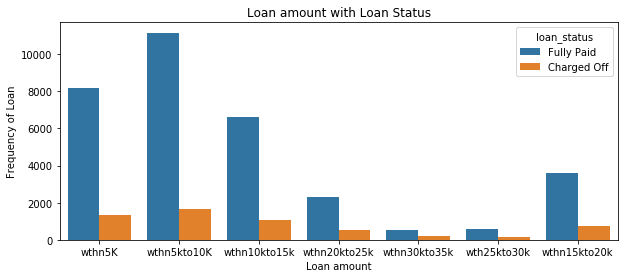

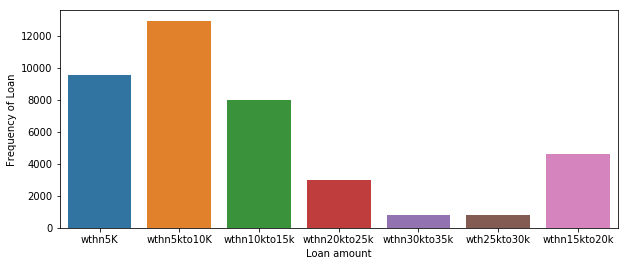

In [77]:
plt.figure(figsize=(10,4))
sns.countplot('cat_loan_amt',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Frequency of Loan')
plt.xlabel('Loan amount')
plt.title('Loan amount with Loan Status')
plt.show()
plt.figure(figsize=(10,4))
sns.countplot(x='cat_loan_amt',data=ln_filtered)
plt.ylabel('Frequency of Loan')
plt.xlabel('Loan amount')
plt.show()

- From the above graphs,First graph follows the same pattern as second interms of charged off i,e With increase in no of people taking loan in that category the charged off no also increases.

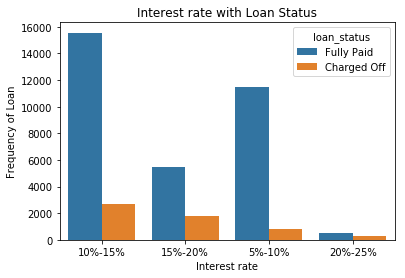

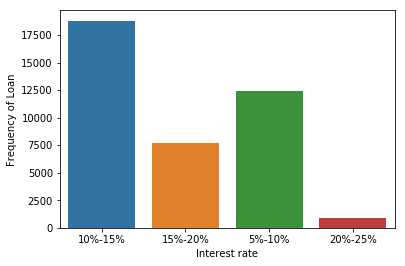

In [78]:
sns.countplot('cat_int_rate',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Frequency of Loan')
plt.xlabel('Interest rate')
plt.title('Interest rate with Loan Status')
plt.show()
sns.countplot(x='cat_int_rate',data=ln_filtered)
plt.ylabel('Frequency of Loan')
plt.xlabel('Interest rate')
plt.show()

- From the above graphs despite the no loan takers with interest rate of 5%-10%,no of people charged off are more in 15%-20% intereset rate category

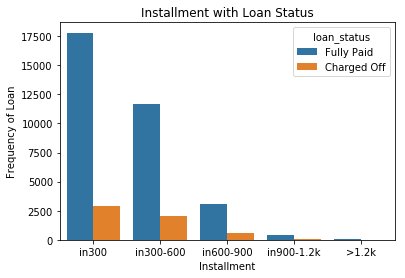

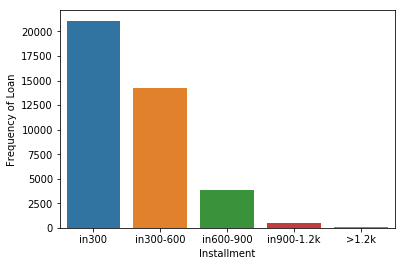

In [79]:
sns.countplot('cat_installment',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Frequency of Loan')
plt.xlabel('Installment')
plt.title('Installment with Loan Status')
plt.show()
sns.countplot(x='cat_installment',data=ln_filtered)
plt.ylabel('Frequency of Loan')
plt.xlabel('Installment')
plt.show()

- From the above graph,First graph follows the same pattern as second.With increase in no of loan takers the no of charged off also incraeses.

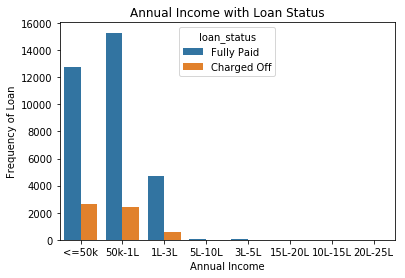

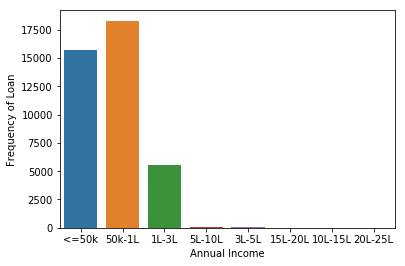

In [136]:
sns.countplot('cat_ann_inc',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Frequency of Loan')
plt.xlabel('Annual Income')
plt.title('Annual Income with Loan Status')
plt.show()
sns.countplot(x='cat_ann_inc',data=ln_filtered)
plt.ylabel('Frequency of Loan')
plt.xlabel('Annual Income')
plt.show()

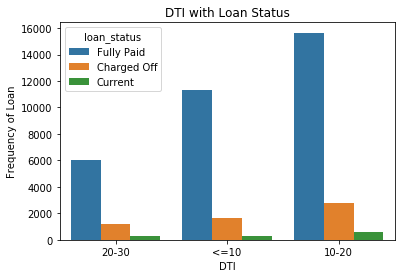

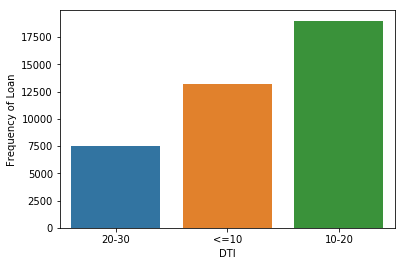

In [81]:
sns.countplot('cat_dti',hue='loan_status',data=ln_filtered)
plt.ylabel('Frequency of Loan')
plt.xlabel('DTI')
plt.title('DTI with Loan Status')
plt.show()
sns.countplot(x='cat_dti',data=ln_filtered)
plt.ylabel('Frequency of Loan')
plt.xlabel('DTI')
plt.show()

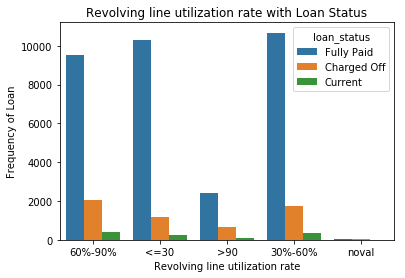

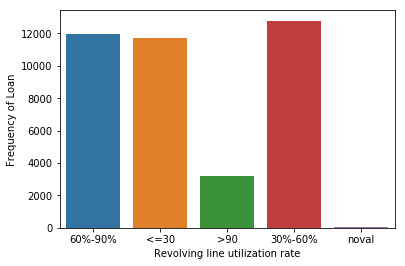

In [82]:
sns.countplot('cat_revol_util',hue='loan_status',data=ln_filtered)
plt.ylabel('Frequency of Loan')
plt.xlabel('Revolving line utilization rate')
plt.title('Revolving line utilization rate with Loan Status')
plt.show()
sns.countplot(x='cat_revol_util',data=ln_filtered)
plt.ylabel('Frequency of Loan')
plt.xlabel('Revolving line utilization rate')
plt.show()

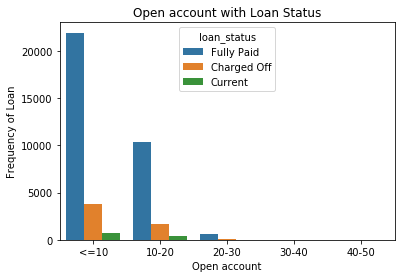

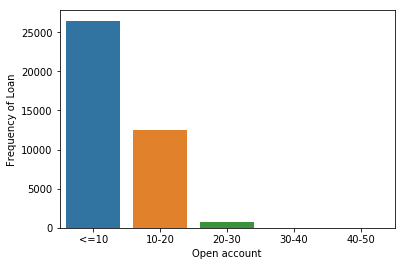

In [83]:
sns.countplot('cat_open_acc',hue='loan_status',data=ln_filtered)
plt.ylabel('Frequency of Loan')
plt.xlabel('Open account')
plt.title('Open account with Loan Status')
plt.show()

sns.countplot(x='cat_open_acc',data=ln_filtered)
plt.ylabel('Frequency of Loan')
plt.xlabel('Open account')
plt.show()

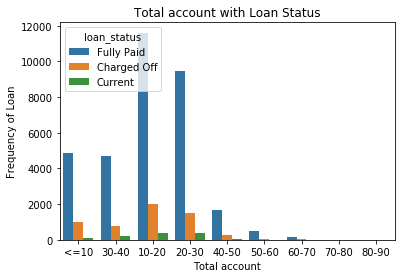

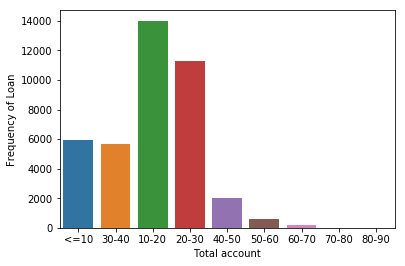

In [84]:
sns.countplot('cat_total_acc',hue='loan_status',data=ln_filtered)
plt.ylabel('Frequency of Loan')
plt.xlabel('Total account')
plt.title('Total account with Loan Status')
plt.show()
sns.countplot(x='cat_total_acc',data=ln_filtered)
plt.ylabel('Frequency of Loan')
plt.xlabel('Total account')
plt.show()

Text(0.5,1,'Interest rate vs Loan amount on Loan status')

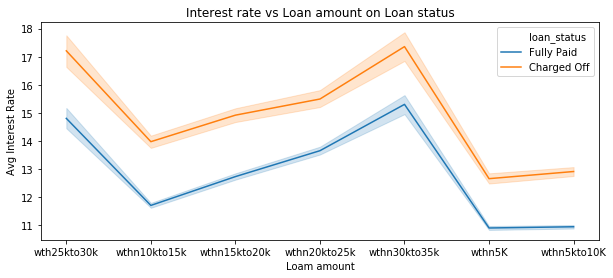

In [86]:
plt.figure(figsize=(10,4))
sns.lineplot('cat_loan_amt','int_rate_withot_per',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Avg Interest Rate')
plt.xlabel('Loam amount')
plt.title('Interest rate vs Loan amount on Loan status')

- From tha above graph,with the increase in the loan amount if the interest rate increases then charged off also increase,like above for loan amount <=5k if the average interest rate within 11 than they tend to pay the entire loan if above than they are not paying. 

Text(0.5,1,'Interest rate vs Installment on Loan status')

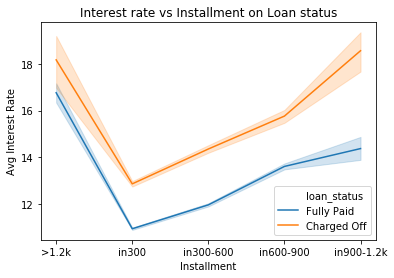

In [87]:
sns.lineplot('cat_installment','int_rate_withot_per',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Avg Interest Rate')
plt.xlabel('Installment')
plt.title('Interest rate vs Installment on Loan status')

- From the above graph,if the average interest rate for the loan is significantly higher for the certain installment than they are charged off i,e for installment of <=300 if the interest rate is within 11 they are paying for >=13 they are likey to be charged off.

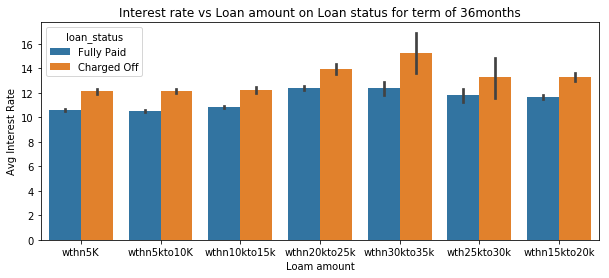

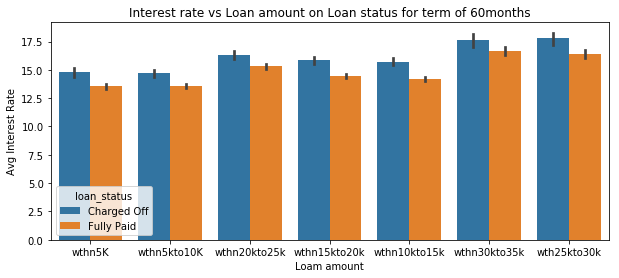

In [88]:
plt.figure(figsize=(10,4))
sns.barplot('cat_loan_amt','int_rate_withot_per',hue='loan_status',data=ln_filtered[(ln_filtered['loan_status']!='Current')&(ln_filtered['term']==' 36 months')])
plt.ylabel('Avg Interest Rate')
plt.xlabel('Loam amount')
plt.title('Interest rate vs Loan amount on Loan status for term of 36months')
plt.show()
plt.figure(figsize=(10,4))
sns.barplot('cat_loan_amt','int_rate_withot_per',hue='loan_status',data=ln_filtered[(ln_filtered['loan_status']!='Current')&(ln_filtered['term']==' 60 months')])
plt.ylabel('Avg Interest Rate')
plt.xlabel('Loam amount')
plt.title('Interest rate vs Loan amount on Loan status for term of 60months')
plt.show()

- From graph-1 for 36months term,we know from the frequency graph for Loan amount that max people take loan within 20k amount,for that range if the average interest rate exceeds above 11 they are likey to default else they tend to pay.

- From graph-1 for 60months term,we know from the frequency graph for Loan amount that max people take loan within 20k amount,for that range if the average interest rate exceeds above 12.5 they are likey to default else they tend to pay.

Text(0.5,1,'Loan amount vs Installment on Loan status')

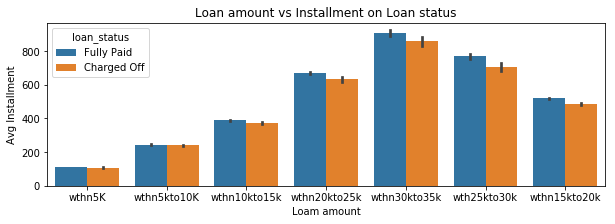

In [89]:
plt.figure(figsize=(10,3))
sns.barplot('cat_loan_amt','installment',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Avg Installment')
plt.xlabel('Loam amount')
plt.title('Loan amount vs Installment on Loan status')

- From the graph,with the increase in the loan amount,avg installment also increases which may increase the chances of charge off.

Text(0.5,1,'Loan Grade vs Loan amount on Loan status')

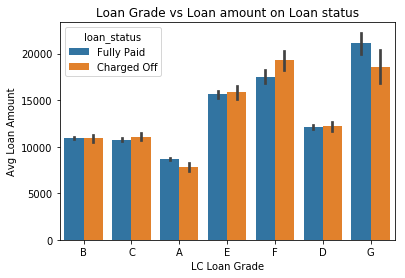

In [119]:
sns.barplot('grade','loan_amnt',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Avg Loan Amount')
plt.xlabel('LC Loan Grade')
plt.title('Loan Grade vs Loan amount on Loan status')

- From the above graph,we know that from the previous graphs,Grade B,A,C,D have highest loan takers.D has more defaulter's where as A has moderate,B has both equally.

Text(0.5,1,'Annual Income vs Emp length on Loan status')

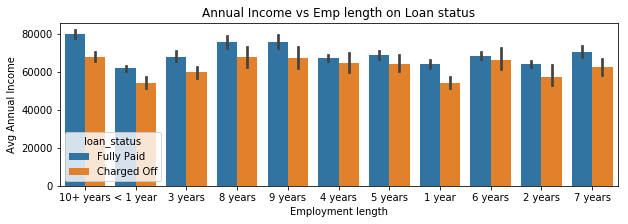

In [137]:
plt.figure(figsize=(10,3))
sns.barplot('emp_length','annual_inc',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Avg Annual Income')
plt.xlabel('Employment length')
plt.title('Annual Income vs Emp length on Loan status')

- From the above graph,with higher the annual income with increased experience tend to pay the loan,if lower the annual income with more experience tend to default. 

Text(0.5,1,'Home Ownership vs Loan amount on Loan status')

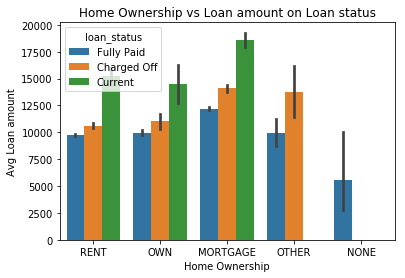

In [122]:
sns.barplot('home_ownership','loan_amnt',hue='loan_status',data=ln_filtered)
plt.ylabel('Avg Loan amount')
plt.xlabel('Home Ownership')
plt.title('Home Ownership vs Loan amount on Loan status')

- From the above graph and from the previous freq graph for home ownership,rent and mortgage people tend to take more loan,if the average loan amount with for the mortage is above 12.5k then the chances of default are higher.For rent if it is more than 10k.

Text(0.5,1,'Annual Income vs Loan amount on Loan status')

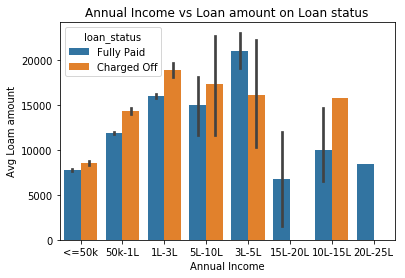

In [138]:
sns.barplot('cat_ann_inc','loan_amnt',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Avg Loam amount')
plt.xlabel('Annual Income')
plt.title('Annual Income vs Loan amount on Loan status')

- from the above graph,if the avg loan amount exceeds with lower annual income than the default chances are higher.

Text(0.5,1,'LC Verification status vs Loan amount on Loan status')

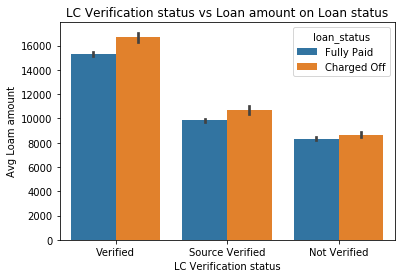

In [94]:
sns.barplot('verification_status','loan_amnt',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Avg Loam amount')
plt.xlabel('LC Verification status')
plt.title('LC Verification status vs Loan amount on Loan status')

- From the above graph if the avg loan amount for verified exceeds above 15k they are likey default.

Text(0.5,1,'Purpose vs Loan amount on Loan status')

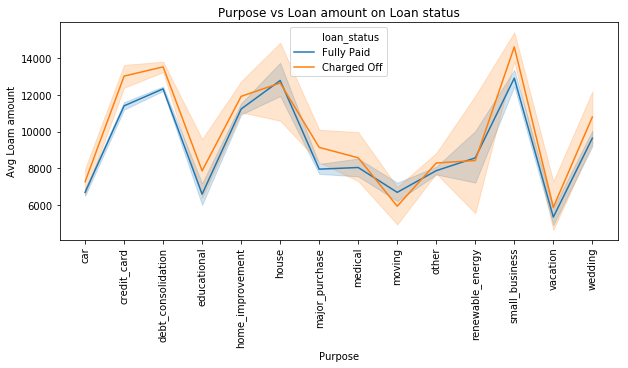

In [95]:
plt.figure(figsize=(10,4))
plt.xticks(rotation='90')
sns.lineplot('purpose','loan_amnt',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Avg Loam amount')
plt.xlabel('Purpose')
plt.title('Purpose vs Loan amount on Loan status')

- From the above graph,we know form the purpose graph for max people take loan for debt deduction and credit card.If the avg loan amount exceeds 12k for debt deduction and 11k for credit card then they tend to default.

Text(0.5,1,'DTI vs Loan amount on Loan status')

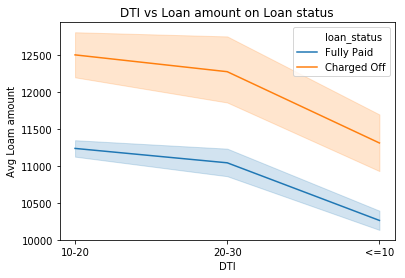

In [96]:
sns.lineplot('cat_dti','loan_amnt',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Avg Loam amount')
plt.xlabel('DTI')
plt.title('DTI vs Loan amount on Loan status')

- From the above graph,with increase in the DTI the loan amount increases and default also high.

Text(0.5,1,'Delinquency for past 2yrs vs Loan amount on Loan status')

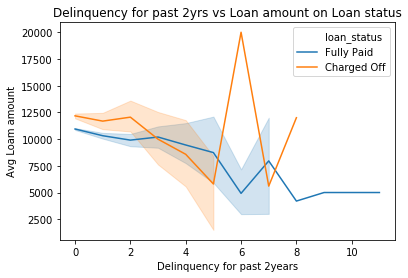

In [97]:
sns.lineplot('delinq_2yrs','loan_amnt',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Avg Loam amount')
plt.xlabel('Delinquency for past 2years')
plt.title('Delinquency for past 2yrs vs Loan amount on Loan status')

- From Delinquency freq graph,max people have 0,1 as the values,from the above graph if we give avg loan above 11k they are likey to default for these delinquency

Text(0.5,1,'No of inquiries in past 6 months vs Loan amount on Loan status')

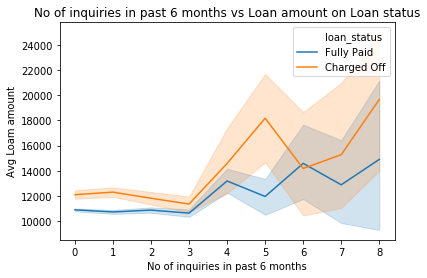

In [98]:
sns.lineplot('inq_last_6mths','loan_amnt',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Avg Loam amount')
plt.xlabel('No of inquiries in past 6 months')
plt.title('No of inquiries in past 6 months vs Loan amount on Loan status')

- From the freq graph for no of inquiries we know that max people fall in bracket 0-2,So from the above graph if we give the avg loan above 11K then they are likey to default.

Text(0.5,1,'Open Account vs Loan amount on Loan status')

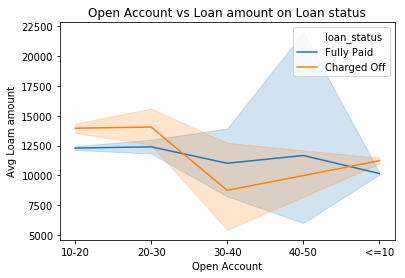

In [99]:
sns.lineplot('cat_open_acc','loan_amnt',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Avg Loam amount')
plt.xlabel('Open Account')
plt.title('Open Account vs Loan amount on Loan status')

- from the freq graph for open accounts max no of people takig loan have <=10 or 10-20 accounts,from the above graph if the avg loan amount for 10-20 acc group exceeds 12.5k and for <=10 acc group more than 10K then they are likey to default.

Text(0.5,1,'No of derogatory public records vs Loan amount on Loan status')

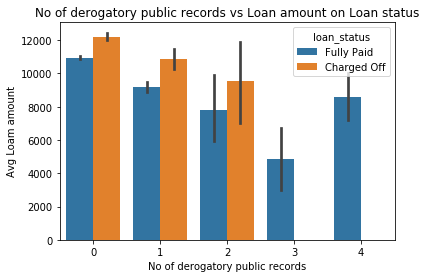

In [141]:
sns.barplot('pub_rec','loan_amnt',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Avg Loam amount')
plt.xlabel('No of derogatory public records')
plt.title('No of derogatory public records vs Loan amount on Loan status')

- From the freq graph for derogatory public records,max people have either 0 or 1,from the above graph if the avg loan amount more than 11k for 0 derogatory they are likely to default.

Text(0.5,1,'Revolving line utilization rate vs Loan amount on Loan status')

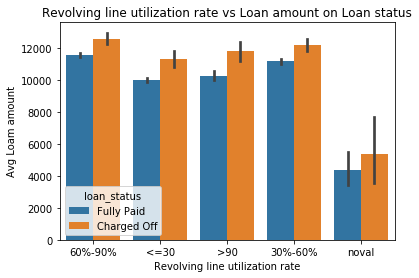

In [101]:
sns.barplot('cat_revol_util','loan_amnt',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Avg Loam amount')
plt.xlabel('Revolving line utilization rate')
plt.title('Revolving line utilization rate vs Loan amount on Loan status')

- As per the study Revol util<=30% to give loan but from freq graph for revol util max people have 30-60% revol util.The default rate increases with increase in revol util.

Text(0.5,1,'No of Public rec bankruptcies vs Loan amount on Loan status')

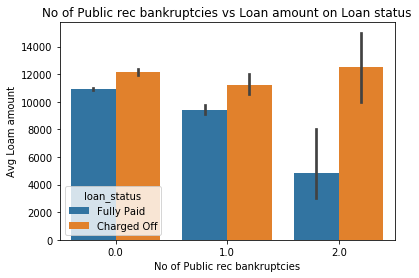

In [102]:
sns.barplot('pub_rec_bankruptcies','loan_amnt',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Avg Loam amount')
plt.xlabel('No of Public rec bankruptcies')
plt.title('No of Public rec bankruptcies vs Loan amount on Loan status')

- From the above graph,with increase in no of bankruptcies default rate also incraeses,for 0 range if the avg loan amount is above 11k then they are likely to default.

Text(0.5,1,'No of Total account vs Loan amount on Loan status')

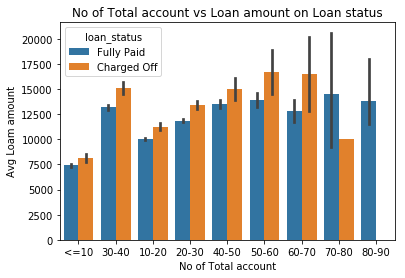

In [103]:
sns.barplot('cat_total_acc','loan_amnt',hue='loan_status',data=ln_filtered[ln_filtered['loan_status']!='Current'])
plt.ylabel('Avg Loam amount')
plt.xlabel('No of Total account')
plt.title('No of Total account vs Loan amount on Loan status')

In [104]:
def dig_loansts(data):
    if data=='Fully Paid' or data=='Current':
        return 0
    else:
        return 1

- **Above function converts categorical loan status to numerical,substituting 0 for fully paid and current and 1 for charged off as the correlation tend to positive higher the chances of default.**

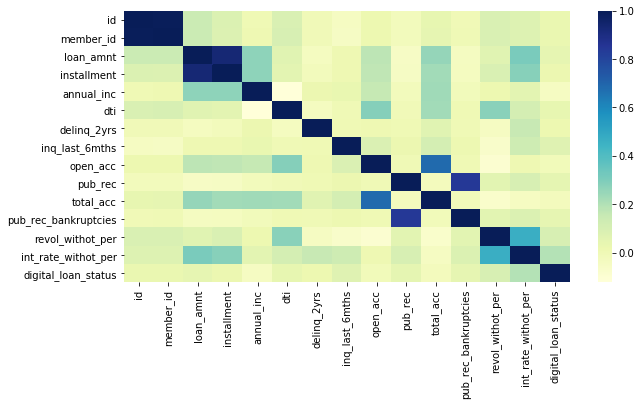

In [105]:
ln_filtered['digital_loan_status']=ln_filtered['loan_status'].map(lambda x:dig_loansts(x))
plt.figure(figsize=(10,5))
sns.heatmap(data=ln_filtered.corr(),cmap="YlGnBu")
#ln_filtered.drop(['dig_status'],axis=1,inplace=True)

In [115]:
ln_filtered.corr()

,id,member_id,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,revol_withot_per,int_rate_withot_per,digital_loan_status
id,1.000000,0.993650,0.141919,0.086587,0.008731,0.095983,-0.008644,-0.042378,0.020388,-0.019440,0.042149,-0.000569,0.094846,0.078831,0.028370
member_id,0.993650,1.000000,0.140710,0.081025,0.009380,0.096963,-0.008119,-0.047086,0.017928,-0.018721,0.044374,0.000809,0.093118,0.074725,0.026438
loan_amnt,0.141919,0.140710,1.000000,0.930288,0.271149,0.066439,-0.031864,0.009229,0.177168,-0.051236,0.256442,-0.036284,0.066149,0.309415,0.048217
installment,0.086587,0.081025,0.930288,1.000000,0.270874,0.054186,-0.019657,0.009722,0.172812,-0.046532,0.230824,-0.033746,0.095484,0.282703,0.022589
annual_inc,0.008731,0.009380,0.271149,0.270874,1.000000,-0.122732,0.023083,0.033908,0.158200,-0.018689,0.235771,-0.016514,0.017926,0.053185,-0.041662
dti,0.095983,0.096963,0.066439,0.054186,-0.122732,1.000000,-0.034452,0.001405,0.288045,-0.004621,0.229881,0.007021,0.277951,0.111162,0.041701
delinq_2yrs,-0.008644,-0.008119,-0.031864,-0.019657,0.023083,-0.034452,1.000000,0.008091,0.011656,0.007463,0.067892,0.002954,-0.043095,0.157916,0.019904
inq_last_6mths,-0.042378,-0.047086,0.009229,0.009722,0.033908,0.001405,0.008091,1.000000,0.091713,0.024802,0.111499,0.015652,-0.068585,0.133013,0.071717
open_acc,0.020388,0.017928,0.177168,0.172812,0.158200,0.288045,0.011656,0.091713,1.000000,0.000172,0.686635,0.005763,-0.089891,0.010395,-0.010742
pub_rec,-0.019440,-0.018721,-0.051236,-0.046532,-0.018689,-0.004621,0.007463,0.024802,0.000172,1.000000,-0.023901,0.843032,0.059069,0.097208,0.050880


- **If we see the above table and the heat map graph,it shows the how the values are correlated to each other a positive correlation with digital loan status indicates higher chances of charged off and less positive indicates loan in paid off or the current status**